<a href="https://colab.research.google.com/github/kyook17/UIUC_BADM/blob/main/Test_1_Practice_Assignment_Kiwook_Song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Load libraries and read the data**

### **1.1 Load libraries**

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# For Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Setting a visualization pallet
sns.set_palette("colorblind")

### **1.2 Read the data**

In [2]:
# 1.2 Read the data

patients_df = pd.read_csv("https://raw.githubusercontent.com/kyook17/UIUC_BADM/main/BADM576_DS/csv/patients.csv")
visits_df = pd.read_csv("https://raw.githubusercontent.com/kyook17/UIUC_BADM/main/BADM576_DS/csv/visits.csv")
hourly_df = pd.read_csv("https://raw.githubusercontent.com/kyook17/UIUC_BADM/main/BADM576_DS/csv/hourly.csv")

# **2. Exploratory Data Analysis**

### **2.1 Shape and head of data**

In [67]:
# Shape
print("There are {} patients and {} features: ".format(patients_df.shape[0],patients_df.shape[1]))
print("There are {} visits and {} features: ".format(visits_df.shape[0],visits_df.shape[1]))
print("There are {} hourly and {} features: ".format(hourly_df.shape[0],hourly_df.shape[1]))
print("\n")

# Head
print(patients_df.head(), "\n")
print(visits_df.head(), "\n")
print(hourly_df.head(), "\n")


There are 1000 patients and 3 features: 
There are 2000 visits and 5 features: 
There are 48000 hourly and 7 features: 


   PatientID        Age  Gender
0          1  48.937024    Male
1          2  44.511598    Male
2          3  41.738649    Male
3          4  56.321015  Female
4          5  31.554930    Male 

   VisitID  PatientID        ReasonForVisit  LengthOfStay VisitOutcome
0        1        994               Surgery             3     Improved
1        2        483  In-Patient Treatment             8     Improved
2        3        480  In-Patient Treatment             8    Unchanged
3        4        834             Emergency            12     Improved
4        5        228  In-Patient Treatment             2     Improved 

   VisitID             DateTime  HeartRate  BloodPressureSystolic  \
0        1  2022-01-01 00:00:00         83                    132   
1        1  2022-01-01 01:00:00         86                    123   
2        1  2022-01-01 02:00:00         66       

### **2.2 Check for Null & Nan values**

In [4]:
# Check Null
print('\nNull values: \n{}'.format(patients_df.isnull().sum()))
print('\nNull values: \n{}'.format(visits_df.isnull().sum()))
print('\nNull values: \n{}'.format(hourly_df.isnull().sum()))

# Check NaN
print("\n")
print('\nNaN values: \n{}'.format(patients_df.isna().sum()))
print('\nNaN values: \n{}'.format(visits_df.isna().sum()))
print('\nNaN values: \n{}'.format(hourly_df.isna().sum()))


Null values: 
PatientID    0
Age          0
Gender       0
dtype: int64

Null values: 
VisitID           0
PatientID         0
ReasonForVisit    0
LengthOfStay      0
VisitOutcome      0
dtype: int64

Null values: 
VisitID                       0
DateTime                      0
HeartRate                     0
BloodPressureSystolic         0
BloodPressureDiastolic        0
MedicationAdministered        0
MedicationType            35813
dtype: int64



NaN values: 
PatientID    0
Age          0
Gender       0
dtype: int64

NaN values: 
VisitID           0
PatientID         0
ReasonForVisit    0
LengthOfStay      0
VisitOutcome      0
dtype: int64

NaN values: 
VisitID                       0
DateTime                      0
HeartRate                     0
BloodPressureSystolic         0
BloodPressureDiastolic        0
MedicationAdministered        0
MedicationType            35813
dtype: int64


### **2.3 Check the data types**

In [77]:
print("\nData Types: \n{}".format(patients_df.dtypes))
print("\nData Types: \n{}".format(visits_df.dtypes))
print("\nData Types: \n{}".format(hourly_df.dtypes))

# Convert 'DateTime' in the hourly dataset to datetime type
hourly_df['DateTime'] = pd.to_datetime(hourly_df['DateTime'])


Data Types: 
PatientID      int64
Age          float64
Gender        object
dtype: object

Data Types: 
VisitID            int64
PatientID          int64
ReasonForVisit    object
LengthOfStay       int64
VisitOutcome      object
dtype: object

Data Types: 
VisitID                            int64
DateTime                  datetime64[ns]
HeartRate                          int64
BloodPressureSystolic              int64
BloodPressureDiastolic             int64
MedicationAdministered            object
MedicationType                    object
dtype: object


# **3. Business Questions**

### **3.1 Demographic profile**

Create a demographic profile of the hospital's patient population, including age distribution and gender ratio. Also answer whether both genders have similar age distribution?

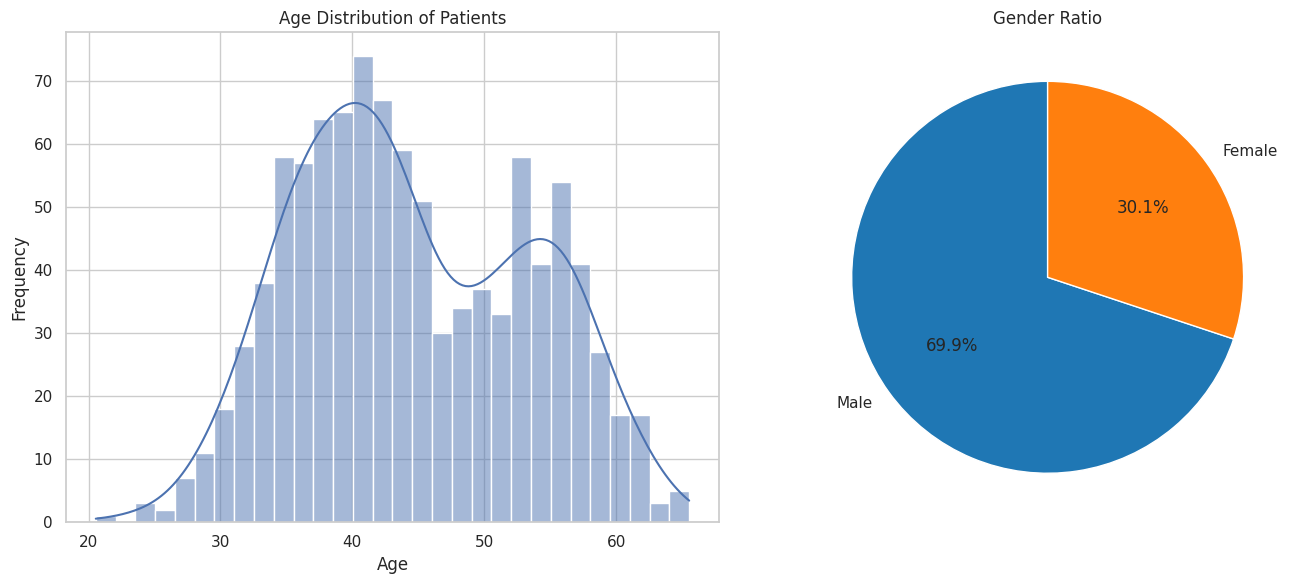


Age Summary: 
count    1000.000000
mean       44.565924
std         8.868429
min        20.552396
25%        37.633683
50%        43.155237
75%        52.449393
max        65.529528
Name: Age, dtype: float64


In [6]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting Age distribution
plt.figure(figsize=(14, 6))

# Age Distribution Plot
plt.subplot(1, 2, 1)
sns.histplot(patients_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Ratio Plot
plt.subplot(1, 2, 2)
gender_counts = patients_df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:orange'])
plt.title('Gender Ratio')
plt.ylabel('')  # Remove the y-label as it's not necessary for a pie chart

plt.tight_layout()
plt.show()

print("\nAge Summary: \n{}".format(patients_df['Age'].describe()))

- **Age Distribution**: The age of patients ranges from approximately 20.6 to 65.5 years, with a mean age of around 44.6 years. The distribution appears to be relatively normal with a slight skew towards older ages.

- **Gender Ratio**: The pie chart shows a slight predominance of Male over Female.

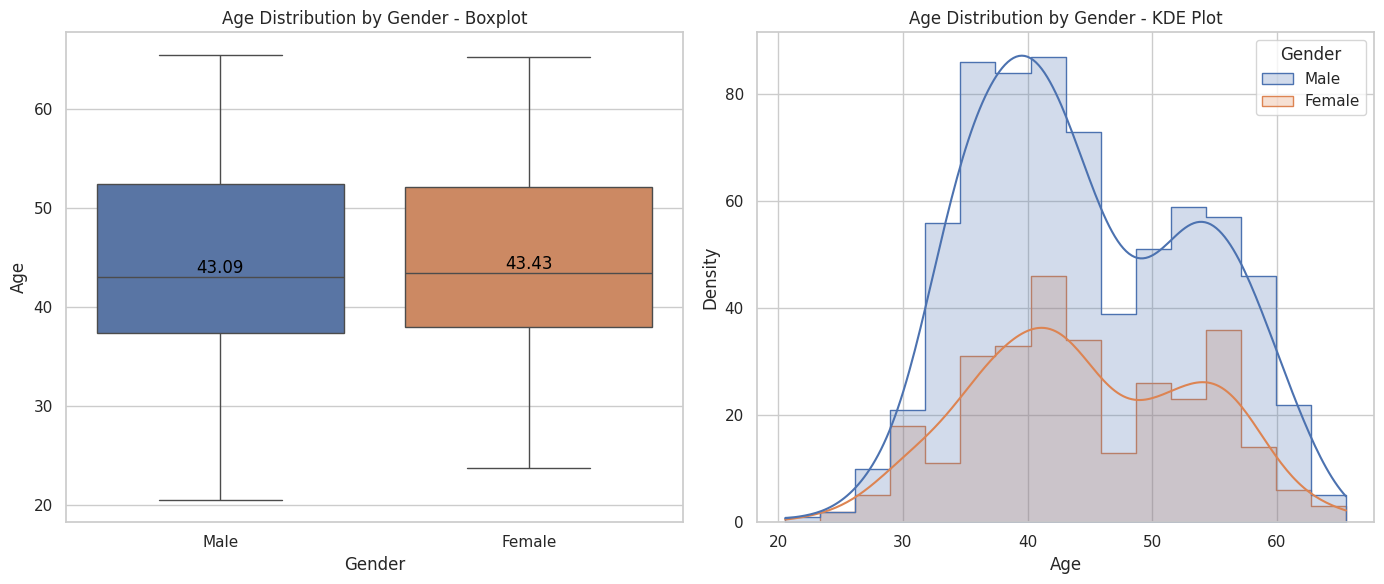


Age Summary: 
        count       mean       std        min        25%        50%  \
Gender                                                                
Female  301.0  44.630416  8.867787  23.818680  37.985292  43.425343   
Male    699.0  44.538152  8.874911  20.552396  37.382192  43.090212   

              75%        max  
Gender                        
Female  52.199517  65.240338  
Male    52.496429  65.529528  


In [7]:
plt.figure(figsize=(14, 6))

# Boxplot for Age distribution by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Age', data=patients_df, hue='Gender')

# Calculate medians
median_age = patients_df.groupby('Gender')['Age'].median().reset_index()
Gender = ['Male', 'Female']
for i, Gender in enumerate(Gender):
    median_value = patients_df[patients_df['Gender'] == Gender]['Age'].median()
    plt.text(i, median_value, f'{median_value:.2f}', ha='center', va='bottom', color='black')

plt.title('Age Distribution by Gender - Boxplot')
plt.xlabel('Gender')
plt.ylabel('Age')

# Histogram for Age distribution by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=patients_df, x='Age', hue='Gender', kde=True, element='step', common_norm=False)
plt.title('Age Distribution by Gender - KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

print("\nAge Summary: \n{}".format(patients_df.groupby('Gender')['Age'].describe()))

**Age Distribution by Gender**
- **Boxplot**: The boxplot illustrates that the median age is quite similar between genders, and there is no outliers suggests.

- **Histogram**: The grouped Histogram shows the age distribution for each gender side by side. Both genders show a relatively similar distribution, with peaks and troughs occurring at similar ages.

**Summary**: Although there are some differences in the spread and specific distributions of ages between genders, the overall distributions appear fairly similar. Both genders have a broad range of ages with a concentration of patients in the middle age ranges, and the median ages are close to each other.


### **3.2 Comparable length of stay**

Do males and females have comparable length of stay?

In [8]:
# Merging the patients and visits datasets on PatientID
merged_df = pd.merge(visits_df, patients_df, on='PatientID')

print(merged_df.head(), "\n")

   VisitID  PatientID        ReasonForVisit  LengthOfStay VisitOutcome  \
0        1        994               Surgery             3     Improved   
1      631        994             Emergency             3     Improved   
2        2        483  In-Patient Treatment             8     Improved   
3      606        483  In-Patient Treatment             5     Improved   
4        3        480  In-Patient Treatment             8    Unchanged   

         Age Gender  
0  34.467008   Male  
1  34.467008   Male  
2  57.634177   Male  
3  57.634177   Male  
4  33.984824   Male   



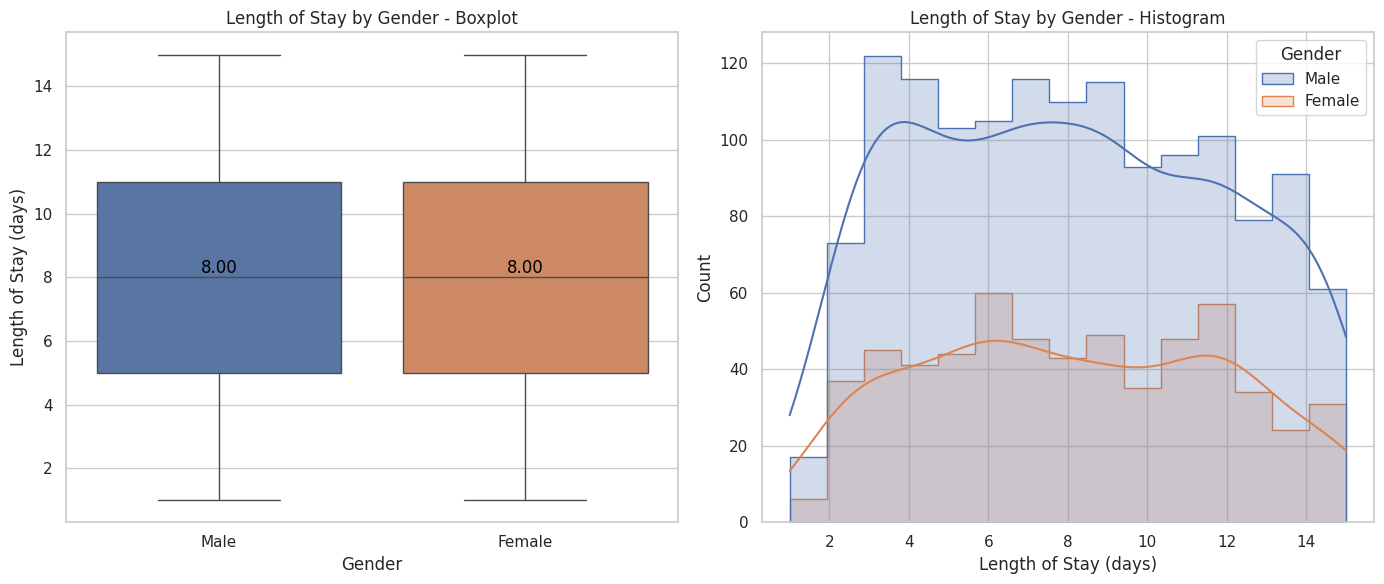


Length of Stay Summary: 
         count      mean       std  min  25%  50%   75%   max
Gender                                                       
Female   602.0  8.114618  3.837179  1.0  5.0  8.0  11.0  15.0
Male    1398.0  8.067954  3.879958  1.0  5.0  8.0  11.0  15.0


In [9]:
# Visualizing the Length of Stay by Gender using boxplot and histograms
plt.figure(figsize=(14, 6))

# Boxplot for Length of Stay by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='LengthOfStay', data=merged_df, hue='Gender')

Gender = ['Male', 'Female']
for i, Gender in enumerate(Gender):
    median_value = merged_df[merged_df['Gender'] == Gender]['LengthOfStay'].median()
    plt.text(i, median_value, f'{median_value:.2f}', ha='center', va='bottom', color='black')

plt.title('Length of Stay by Gender - Boxplot')
plt.xlabel('Gender')
plt.ylabel('Length of Stay (days)')

# Histogram for Length of Stay by Gender
plt.subplot(1, 2, 2)
sns.histplot(data=merged_df, x='LengthOfStay', hue='Gender', kde=True, element='step', common_norm=False)
plt.title('Length of Stay by Gender - Histogram')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print("\nLength of Stay Summary: \n{}".format(merged_df.groupby('Gender')['LengthOfStay'].describe()))

- **Boxplot Visualization**: The boxplot shows that the median length of stay is the same for both genders, with almost same interquartile range. This suggests that the central tendency and spread of the length of stay are comparable across genders.

- **Histogram Visualization**: The histogram, overlaid with kernel density estimation (KDE), indicates that the distribution of the length of stay for both males and females follows a similar pattern, with peaks around the same length of stay values.

**Summary**: males and females have comparable lengths of stay in the hospital, with very similar distributions in terms of mean, median, and variability. This suggests that, on average, gender does not significantly impact the length of stay in this patient population.

### **3.3 Visit reason analysis**

3.3.1 Is the reason of visit related with Gender?

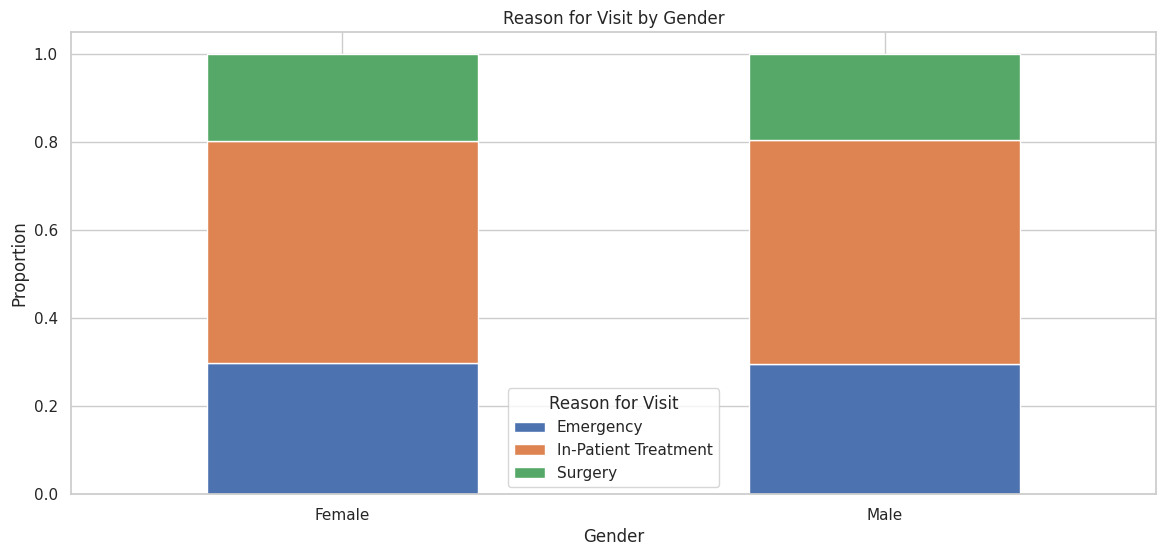

P-value:  0.9606341627102344


In [10]:
# Count of each ReasonForVisit by Gender
visit_rel_gender = merged_df.groupby(['Gender', 'ReasonForVisit'])['VisitID'].count().unstack()
visit_rel_gender_normalized = visit_rel_gender.div(visit_rel_gender.sum(axis=1), axis=0)

# Visualization of ReasonForVisit by Gender using a stacked bar chart
visit_rel_gender_normalized.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Reason for Visit by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Reason for Visit')

plt.show()

# Statistical test for relationship of visit reason and gender
from scipy.stats import chi2_contingency

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(visit_rel_gender)

print("P-value: ", p_value)

**Summary**: Based on this dataset and the statistical test performed, the reason for a visit does not appear to be related to the patient's gender.

3.3.2 Is the reason of visit related with Age?

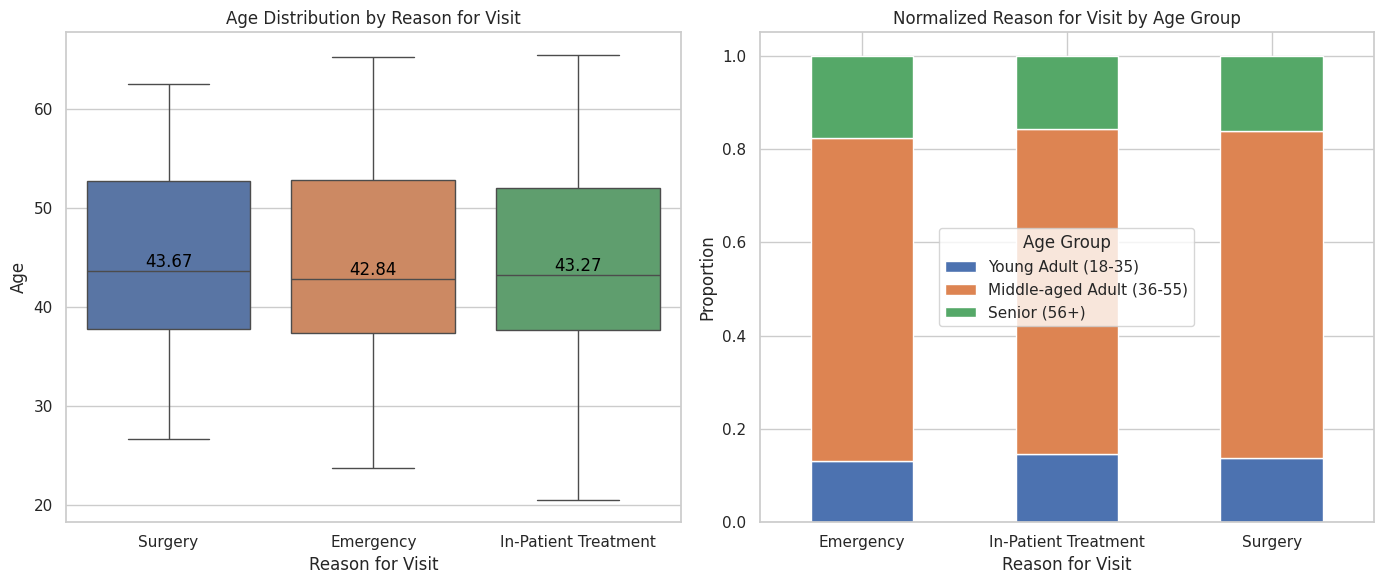

P-value:  0.8350350980501804


In [11]:
# Create subplots
plt.figure(figsize=(14, 6))

# Visualizing the Age distribution by ReasonForVisit using a boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='ReasonForVisit', y='Age', data=merged_df, hue='ReasonForVisit')

ReasonForVisit = ['Surgery', 'Emergency', 'In-Patient Treatment']
for i, ReasonForVisit in enumerate(ReasonForVisit):
    median_value = merged_df[merged_df['ReasonForVisit'] == ReasonForVisit]['Age'].median()
    plt.text(i, median_value, f'{median_value:.2f}', ha='center', va='bottom', color='black')

plt.title('Age Distribution by Reason for Visit')
plt.xlabel('Reason for Visit')
plt.ylabel('Age')

# Categorize ages into groups for analysis
age_bins = [0, 17, 35, 55, 100]  # Age group boundaries
age_labels = ['Pediatric (0-17)', 'Young Adult (18-35)', 'Middle-aged Adult (36-55)', 'Senior (56+)']
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a crosstabulation of ReasonForVisit and AgeGroup
reason_age_crosstab = pd.crosstab(merged_df['ReasonForVisit'], merged_df['AgeGroup'])
reason_age_crosstab_normalized = reason_age_crosstab.div(reason_age_crosstab.sum(axis=1), axis=0)

# Visualize the data with a stacked bar chart
plt.subplot(1, 2, 2)
reason_age_crosstab_normalized.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Normalized Reason for Visit by Age Group')
plt.xlabel('Reason for Visit')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.legend(title='Age Group')

plt.tight_layout()
plt.show()

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(reason_age_crosstab)
print("P-value: ", p_value)

**Summary**: Given the p-value (greater than 0.05), we fail to reject the null hypothesis of independence. This indicates that, based on this dataset and the statistical test performed, there is no significant association between the reason for a visit and the patient's age group.

### **3.4 Health outcome analysis**

Which demographics (age, gender) have better health outcomes?

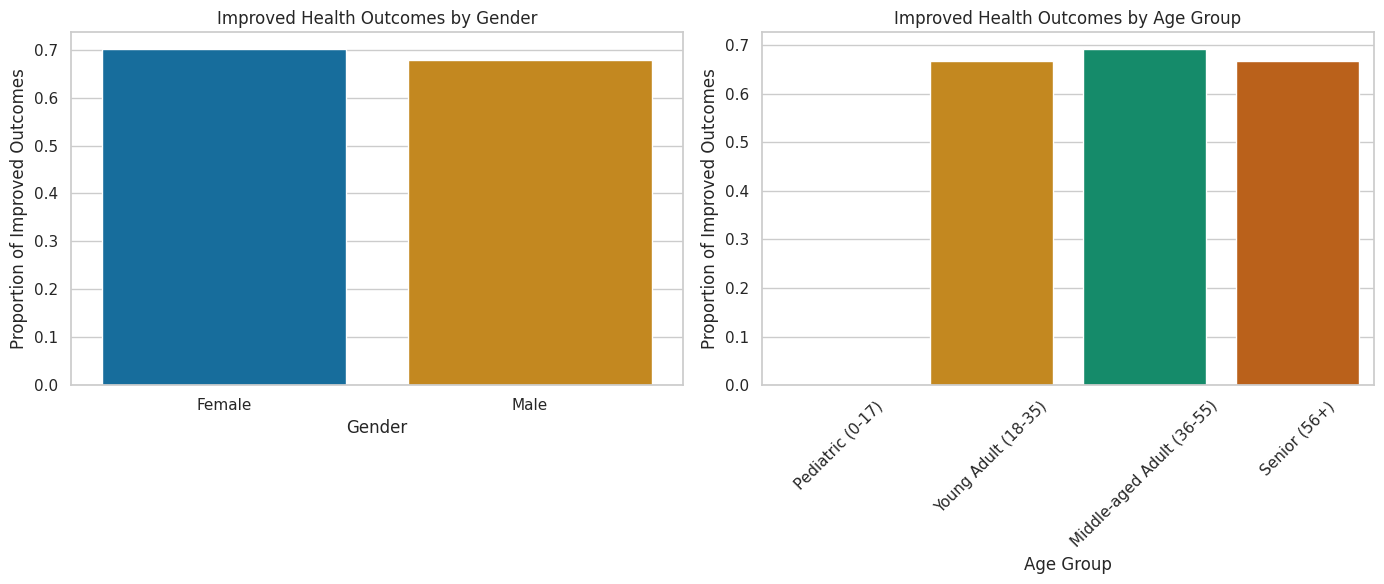

   Gender  VisitOutcome
0  Female      0.700997
1    Male      0.677396 

                    AgeGroup  VisitOutcome
0           Pediatric (0-17)           NaN
1        Young Adult (18-35)      0.667857
2  Middle-aged Adult (36-55)      0.691810
3               Senior (56+)      0.667683


In [68]:
# Analyze by Gender
improved_gender = merged_df.groupby(['Gender', 'VisitOutcome']).size().unstack(fill_value=0)
improved_gender_normalized = merged_df.groupby('Gender')['VisitOutcome'].apply(lambda x: (x == 'Improved').mean()).reset_index()

# Analyze by Age Group
improved_age_group = merged_df.groupby(['AgeGroup', 'VisitOutcome']).size().unstack(fill_value=0)
improved_age_group_normalized = merged_df.groupby('AgeGroup')['VisitOutcome'].apply(lambda x: (x == 'Improved').mean()).reset_index()

# Visualization
plt.figure(figsize=(14, 6))

# Improved Health Outcomes by Gender
plt.subplot(1, 2, 1)
sns.barplot(data=improved_gender_normalized, x='Gender', y='VisitOutcome', hue='Gender')
plt.title('Improved Health Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Improved Outcomes')
plt.xticks(rotation=0)

# Improved Health Outcomes by Age Group
plt.subplot(1, 2, 2)
sns.barplot(data=improved_age_group_normalized, x='AgeGroup', y='VisitOutcome', hue='AgeGroup')
plt.title('Improved Health Outcomes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Improved Outcomes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(improved_gender_normalized, '\n')
print(improved_age_group_normalized)

- **Gender**: The bar plot shows the proportion of "Improved" health outcomes by gender. Female patients have a slightly higher proportion of improved outcomes (approximately 70.1%) compared to male patients (approximately 67.7%).

- **Age Group**: Middle-aged adults (36-55) have the highest proportion of "Improved" outcomes (approximately 69.2%), suggesting that patients in this age group may have better health outcomes compared to other age groups.

### **3.5 Length of stay analysis**

Examine the length of stay for different visit reasons. Which types of visits typically result in longer hospital stays?

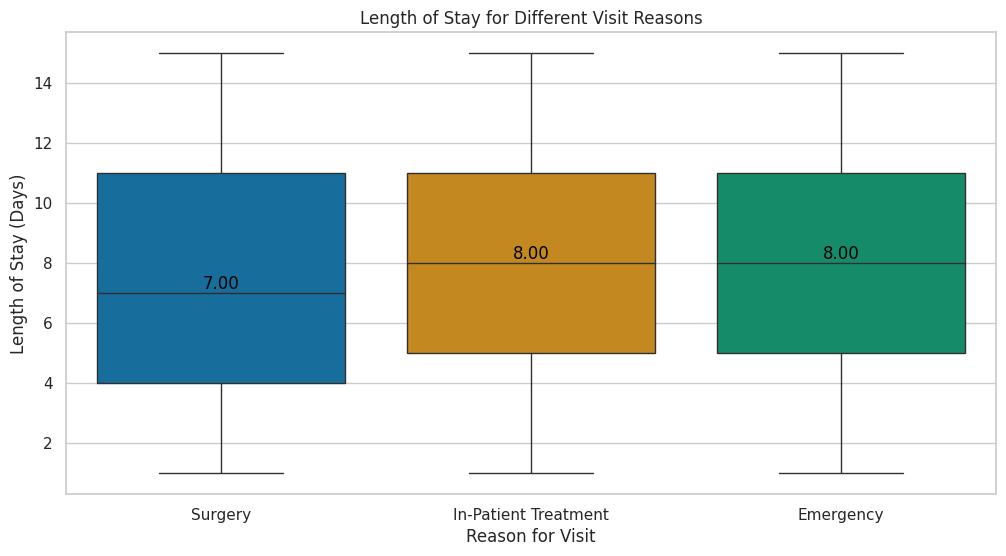

,ReasonForVisit,LengthOfStay
0,Emergency,8.163300
1,In-Patient Treatment,8.200787
2,Surgery,7.648718


In [71]:
# Calculate the average length of stay for each reason for visit
average_length_of_stay = visits_df.groupby('ReasonForVisit')['LengthOfStay'].mean().reset_index()

# Visualize the length of stay distributions for each visit reason
plt.figure(figsize=(12, 6))
sns.boxplot(data=visits_df, x='ReasonForVisit', y='LengthOfStay', hue='ReasonForVisit')

Reason = ['Surgery', 'In-Patient Treatment', 'Emergency']
for i, Reason in enumerate(Reason):
    median_value = visits_df[visits_df['ReasonForVisit'] == Reason]['LengthOfStay'].median()
    plt.text(i, median_value, f'{median_value:.2f}', ha='center', va='bottom', color='black')

plt.title('Length of Stay for Different Visit Reasons')
plt.xlabel('Reason for Visit')
plt.ylabel('Length of Stay (Days)')
plt.show()

average_length_of_stay

**Summary**: Based on the analysis, the types of visits that typically result in longer hospital stays are "In-Patient Treatment" and "Emergency" visits, with average stays just over 8 days. "Surgery" visits have a slightly shorter average length of stay, around 7.65 days.

### **3.6 Medication administered by gender**

Examine whether there exist gender differences in medication administered? If there exists a gender difference in medication administered, is it due to different underlying reason for visit?

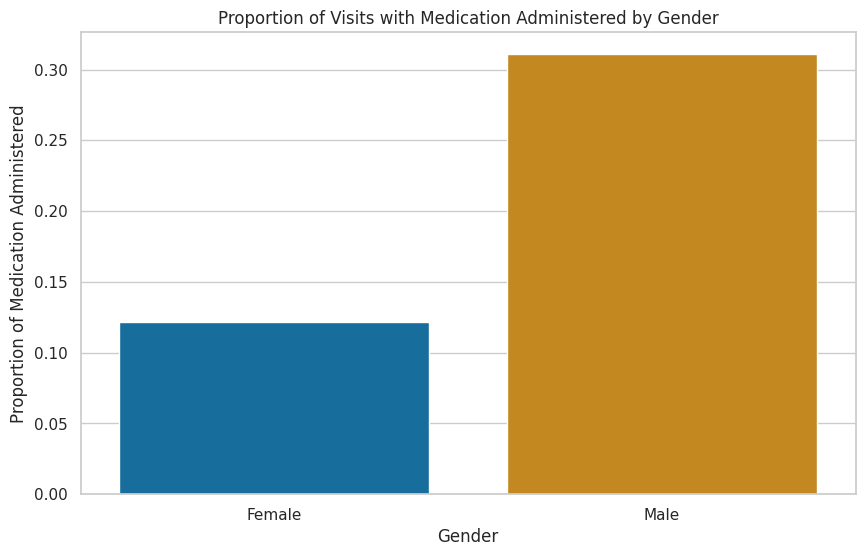

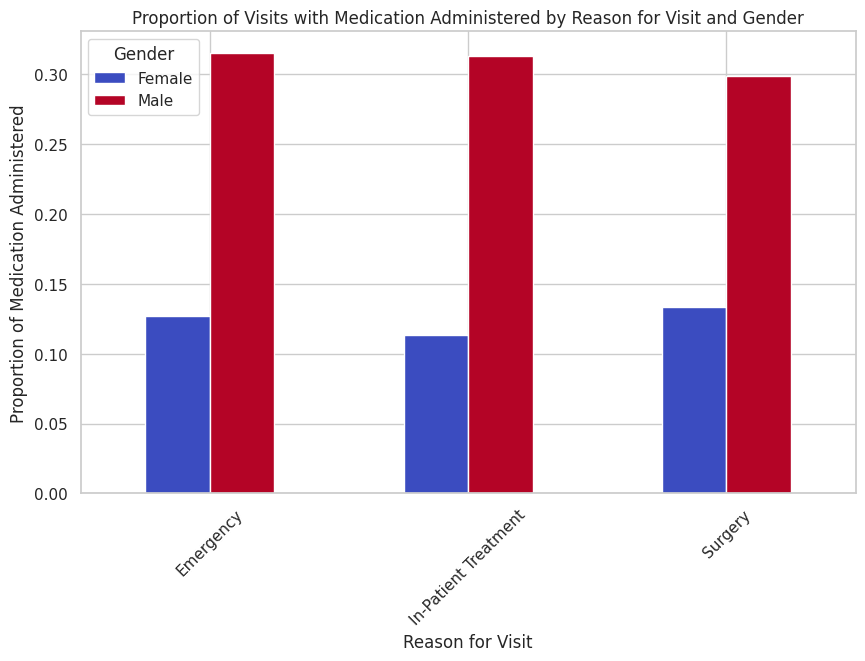

In [109]:
# Merge visits and hourly datasets to include medication information along with gender and reason for visit
merged_visits_hourly = pd.merge(visits_df, hourly_df, on='VisitID', how='left')
merged_all_df = pd.merge(merged_visits_hourly, patients_df, on='PatientID', how='left')

# Calculate the proportion of visits where medication was administered by gender
medication_by_gender = merged_all_df.groupby('Gender')['MedicationAdministered'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Visualize the proportion of visits with medication administered by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=medication_by_gender, x='Gender', y='MedicationAdministered', hue='Gender')
plt.title('Proportion of Visits with Medication Administered by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Medication Administered')
plt.show()

# Calculate the proportion of visits with medication administered by reason for visit and gender
medication_by_reason_gender = merged_all_df.groupby(['ReasonForVisit', 'Gender'])['MedicationAdministered'].apply(lambda x: (x == 'Yes').mean()).unstack()

# Visualize the proportion of visits with medication administered by reason for visit and gender
plt.figure(figsize=(10, 6))
medication_by_reason_gender.plot(kind='bar', colormap='coolwarm', ax=plt.gca())
plt.title('Proportion of Visits with Medication Administered by Reason for Visit and Gender')
plt.xlabel('Reason for Visit')
plt.ylabel('Proportion of Medication Administered')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

- **Gender**: The bar plot shows the proportion of visits where medication was administered for each gender. There is a noticeable difference between genders, with male patients having a higher proportion of visits where medication was administered (approximately 31.1%) compared to female patients (approximately 12.2%).

- **Reason for Visit**: The differences in medication administration between genders are present within each reason for visit category, suggesting that the observed gender difference in medication administration is not solely due to different underlying reasons for visits.

**Summary**: There is a clear gender difference in medication administration, with male patients more likely to receive medication across all reasons for visits.

### **3.7 Vital signs data analysis**

Analyze the hourly vital signs data to identify any common patterns or abnormalities. How do these metrics vary by visit reason and patient demographics?

In [111]:
# Categorize ages into groups for analysis
age_bins = [0, 17, 35, 55, 100]  # Age group boundaries
age_labels = ['Pediatric (0-17)', 'Young Adult (18-35)', 'Middle-aged Adult (36-55)', 'Senior (56+)']
merged_all_df['AgeGroup'] = pd.cut(merged_all_df['Age'], bins=age_bins, labels=age_labels, right=False)

merged_all_df.head()

,VisitID,PatientID,ReasonForVisit,LengthOfStay,VisitOutcome,DateTime,HeartRate,BloodPressureSystolic,BloodPressureDiastolic,MedicationAdministered,MedicationType,Age,Gender,AgeGroup
0,1,994,Surgery,3,Improved,2022-01-01 00:00:00,83,132,93,No,NaN,34.467008,Male,Young Adult (18-35)
1,1,994,Surgery,3,Improved,2022-01-01 01:00:00,86,123,86,No,NaN,34.467008,Male,Young Adult (18-35)
2,1,994,Surgery,3,Improved,2022-01-01 02:00:00,66,134,98,No,NaN,34.467008,Male,Young Adult (18-35)
3,1,994,Surgery,3,Improved,2022-01-01 03:00:00,84,137,101,No,NaN,34.467008,Male,Young Adult (18-35)
4,1,994,Surgery,3,Improved,2022-01-01 04:00:00,77,136,103,No,NaN,34.467008,Male,Young Adult (18-35)


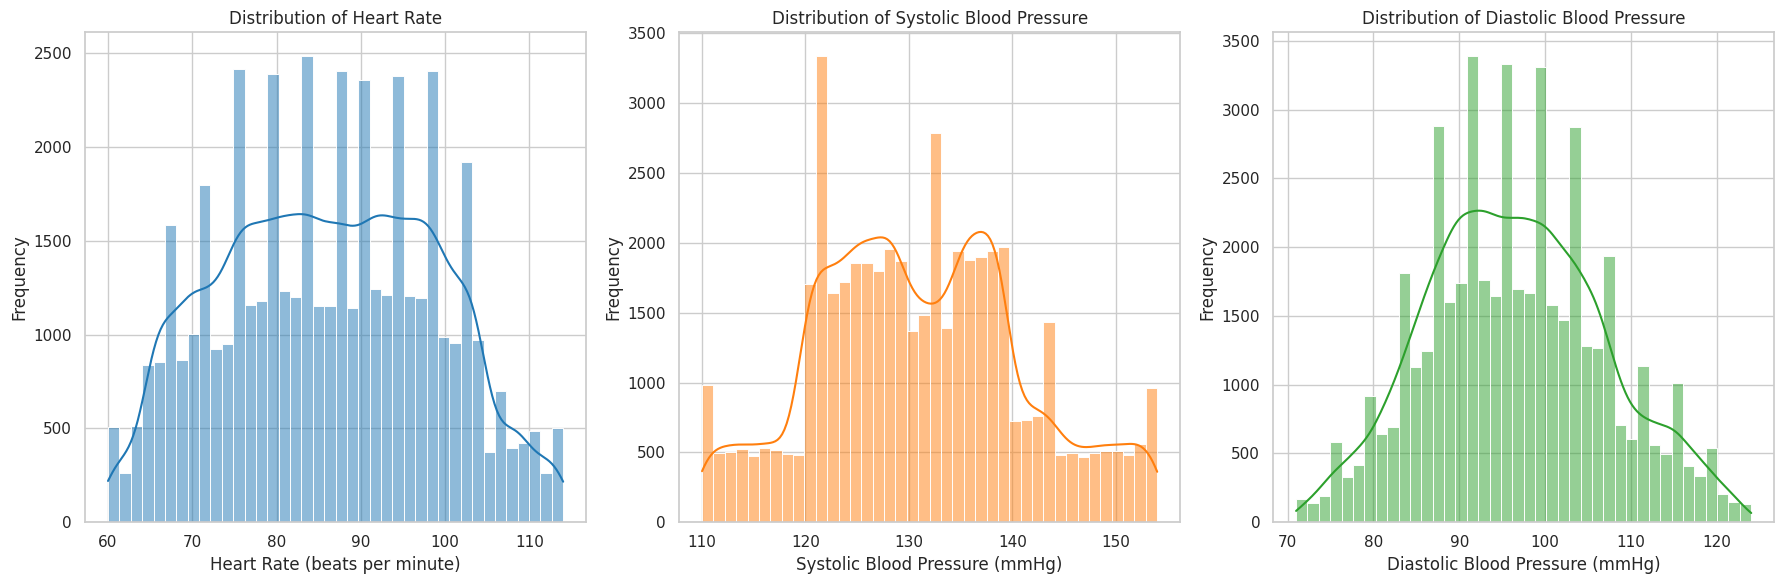

In [103]:
# Visualize the distributions of heart rate and blood pressure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(merged_all_df['HeartRate'], bins=40, kde=True, ax=axes[0], color='tab:blue')
axes[0].set_title('Distribution of Heart Rate')
axes[0].set_xlabel('Heart Rate (beats per minute)')
axes[0].set_ylabel('Frequency')

sns.histplot(merged_all_df['BloodPressureSystolic'], bins=40, kde=True, ax=axes[1], color='tab:orange')
axes[1].set_title('Distribution of Systolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[1].set_ylabel('Frequency')

sns.histplot(merged_all_df['BloodPressureDiastolic'], bins=40, kde=True, ax=axes[2], color='tab:green')
axes[2].set_title('Distribution of Diastolic Blood Pressure')
axes[2].set_xlabel('Diastolic Blood Pressure (mmHg)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

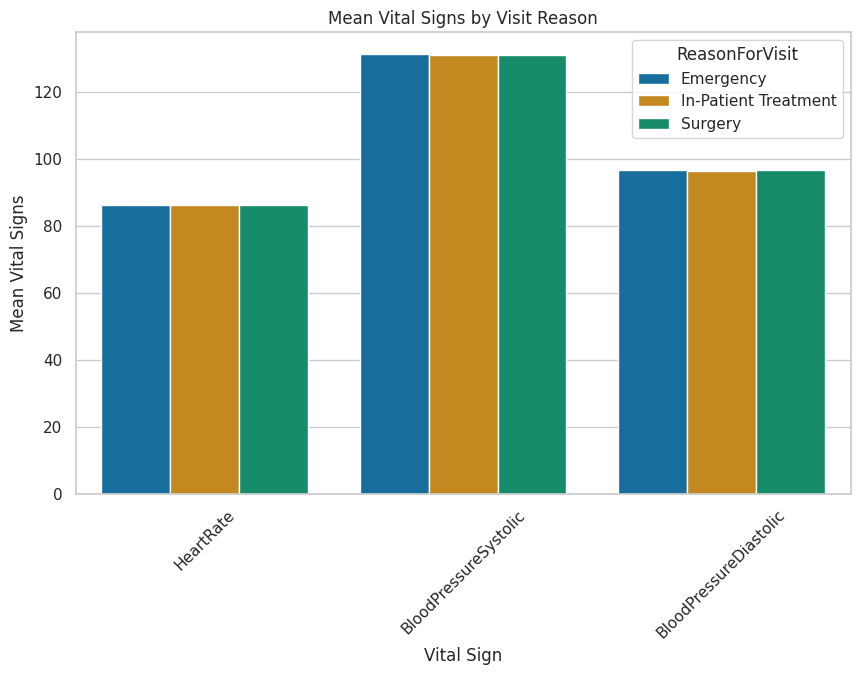

,ReasonForVisit,HeartRate,BloodPressureSystolic,BloodPressureDiastolic
0,Emergency,86.057660,131.145763,96.627736
1,In-Patient Treatment,86.097851,130.959154,96.453289
2,Surgery,86.166132,131.039850,96.543376


In [129]:
# Calculate mean vital signs by visit reason
mean_vitals_by_reason = merged_all_df.groupby('ReasonForVisit').agg({
    'HeartRate': 'mean',
    'BloodPressureSystolic': 'mean',
    'BloodPressureDiastolic': 'mean'
}).reset_index()
mean_vitals_by_reason_melted = pd.melt(mean_vitals_by_reason, id_vars=['ReasonForVisit'], var_name='Vital Sign', value_name='Mean Value')

# Visualize mean vital signs by visit reason
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_vitals_by_reason_melted, x='Vital Sign', y='Mean Value', hue='ReasonForVisit')
plt.title('Mean Vital Signs by Visit Reason')
plt.xlabel('Vital Sign')
plt.ylabel('Mean Vital Signs')
plt.xticks(rotation=45)
plt.legend(title='ReasonForVisit')
plt.show()

mean_vitals_by_reason

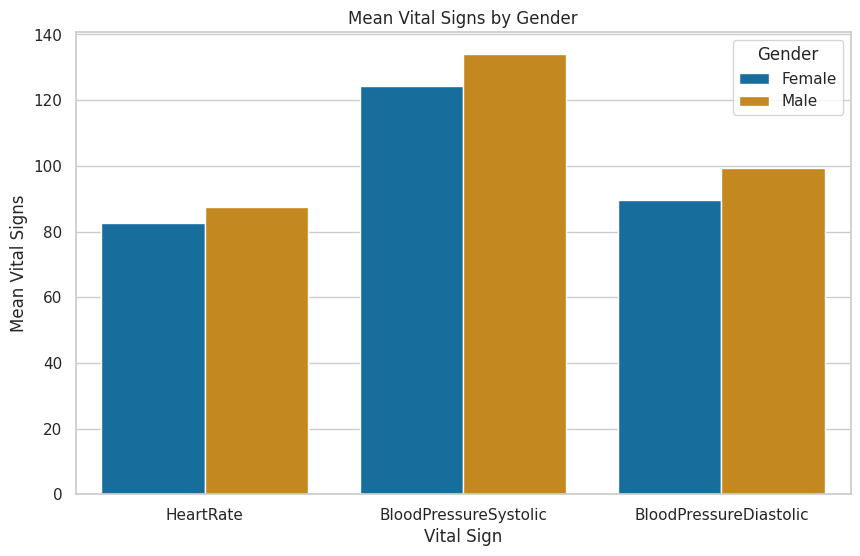

,Gender,HeartRate,BloodPressureSystolic,BloodPressureDiastolic
0,Female,82.600983,124.169089,89.629707
1,Male,87.605627,133.984859,99.490880


In [130]:
# Calculate mean vital signs by gender
mean_vitals_by_gender = merged_all_df.groupby('Gender').agg({
    'HeartRate': 'mean',
    'BloodPressureSystolic': 'mean',
    'BloodPressureDiastolic': 'mean'
}).reset_index()
mean_vitals_by_gender_melted = pd.melt(mean_vitals_by_gender, id_vars=['Gender'], var_name='Vital Sign', value_name='Mean Value')

# Visualize mean vital signs by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_vitals_by_gender_melted, x='Vital Sign', y='Mean Value', hue='Gender')
plt.title('Mean Vital Signs by Gender')
plt.xlabel('Vital Sign')
plt.ylabel('Mean Vital Signs')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

mean_vitals_by_gender

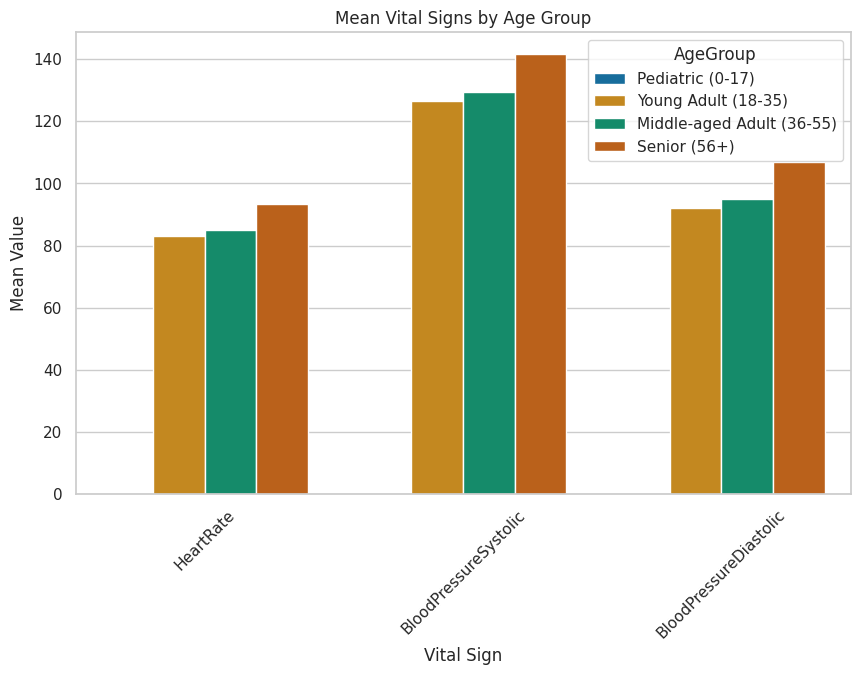

,AgeGroup,HeartRate,BloodPressureSystolic,BloodPressureDiastolic
0,Pediatric (0-17),NaN,NaN,NaN
1,Young Adult (18-35),83.148958,126.567857,92.023661
2,Middle-aged Adult (36-55),85.006466,129.446659,94.954891
3,Senior (56+),93.255335,141.560595,107.016768


In [131]:
# Group by age group and calculate mean vital signs
mean_vitals_by_age_group = merged_all_df.groupby('AgeGroup').agg({
    'HeartRate': 'mean',
    'BloodPressureSystolic': 'mean',
    'BloodPressureDiastolic': 'mean'
}).reset_index()
mean_vitals_by_age_group_melted = pd.melt(mean_vitals_by_age_group, id_vars=['AgeGroup'], var_name='Vital Sign', value_name='Mean Value')

# Visualize mean vital signs by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_vitals_by_age_group_melted, x='Vital Sign', y='Mean Value', hue='AgeGroup')
plt.title('Mean Vital Signs by Age Group')
plt.xlabel('Vital Sign')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='AgeGroup')
plt.show()

mean_vitals_by_age_group

- **Reason for Visit Difference**: The vital signs do not show significant variation across different reasons for hospital visits, suggesting that the nature of the visit (Emergency, In-Patient Treatment, Surgery) might not drastically affect these particular metrics on average.
- **Gender Differences**: The observed differences in vital signs between genders, with males having higher averages, could reflect physiological differences, variations in health conditions, or other factors influencing heart rate and blood pressure.
- **Age Group Trends**: The increase in vital signs averages with age, particularly in the senior age group, aligns with common medical understanding that blood pressure tends to rise with age.

### **3.7 Realationship between vital signs and medication administration**

Investigate the relationship between vital signs (Heart Rate and Blood Pressure) and medication administration.

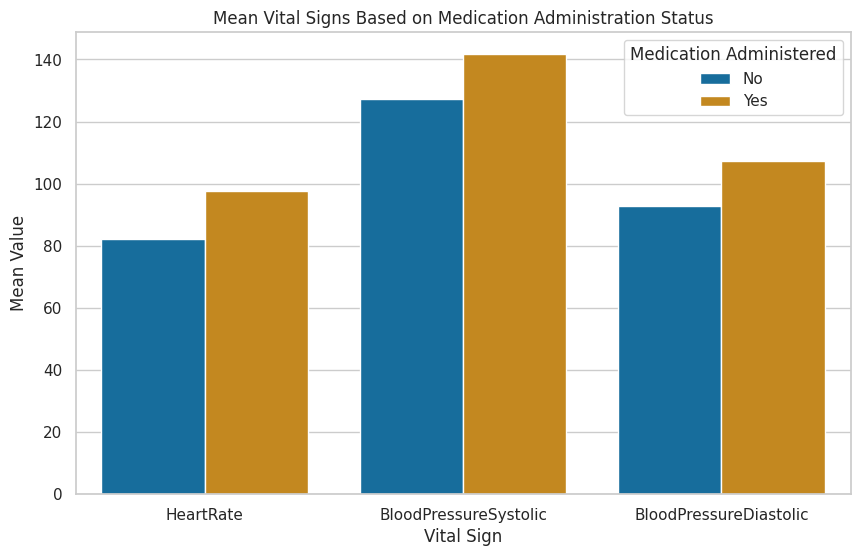

,MedicationAdministered,HeartRate,BloodPressureSystolic,BloodPressureDiastolic
0,No,82.158155,127.406165,92.890403
1,Yes,97.680561,141.680315,107.196521


In [121]:
# Calculate average vital signs based on medication administration status
avg_vitals_medication = merged_all_df.groupby('MedicationAdministered').agg({
    'HeartRate': 'mean',
    'BloodPressureSystolic': 'mean',
    'BloodPressureDiastolic': 'mean'
}).reset_index()

# Visualize the average vital signs based on medication administration status
avg_vitals_medication_melted = pd.melt(avg_vitals_medication, id_vars=['MedicationAdministered'], var_name='Vital Sign', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_vitals_medication_melted, x='Vital Sign', y='Mean Value', hue='MedicationAdministered')
plt.title('Mean Vital Signs Based on Medication Administration Status')
plt.xlabel('Vital Sign')
plt.ylabel('Mean Value')
plt.legend(title='Medication Administered')
plt.show()

avg_vitals_medication

- **No Medication Administered**: The averages for heart rate and blood pressure are lower when no medication is administered.
- **Medication Administered**: There's a noticeable increase in the average heart rate and blood pressure when medication is administered.

**Summary**: The bar plot shows the average vital signs (Heart Rate, Systolic Blood Pressure, Diastolic Blood Pressure) based on whether medication was administered.

1. The conditions requiring medication may involve symptoms or underlying issues that elevate vital signs.
2. Certain medications might have side effects that include increased heart rate and blood pressure.
3. Patients with initially higher vital signs might be more likely to receive medication as part of their treatment.